In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from scipy.spatial import Voronoi, Delaunay, ConvexHull
from scipy.stats import gaussian_kde
import random 
import scipy
from scipy import stats
import itertools
import matplotlib.patches as pat
import glob
import os
import pathlib 
import re
import os
import tqdm

class PointsGenerater:
    
    def  __init__(self, points):
        self.points = points
        if len(self.points) == 0:
            self.points = self.cone_random_gen()
    
    def random_generate(self, d, m):
        #n:次元
        #m:個数
        np.random.seed(40)
        self.points = np.random.rand(m, d)
        return self.points
    
    def two_random_gauss(self):
        np.random.seed(663)
        points_1 = np.random.multivariate_normal(
            [10,10],
            size=(1,300),
            cov=[
                [10,1],
                [0,14]])[0]
        points_2 = np.random.multivariate_normal(
            [-10,-10],
            size=(1,300),
            cov=[
                [15,0],
                [0,20]])[0]
        self.points = np.append(points_1, points_2, axis=0)
        return self.points
    
    def cone_random_gen(self):
        np.random.seed(800)
        
        self.points = np.random.multivariate_normal(
            [0,0],
            size=(1,200),
            cov=[
                [50,0],
                [0,50]])[0]

        for i in range(3):
            i += 1
            points_1 = np.random.multivariate_normal(
                [i * 17, i * 17],
                size=(1,200),
                cov=[
                    [50,0],
                    [0,50]])[0]

            points_2 = np.random.multivariate_normal(
                [i * 25, 0],
                size=(1,200),
                cov=[
                    [40,0],
                    [0,50]])[0]
            self.points = np.append(
                np.append(self.points, points_1, axis=0), 
                points_2, 
                axis=0
            )
        return self.points
    
    def random_points(self):
        return
    
    def multiply_lattice_constant(self, points):
        return
        
    def normalization(self):
        #計算量を下げるため真ん中に寄せる
        return (self.points - np.mean(self.points)) * 100

class BoxSetter:

    def __init__(self, dimention=3):
        self.dimention = dimention
        self.base_vectors:np.array = np.eyes(dimention)
        
    def base_vectors_change(self, b_vectors:np.array):
        self.base_vectors = b_vectors

class VoronoiModel:

    def __init__(self, points:np.array ):

        '''
            #[[1,2,3,4],[71,3,21,4],[-1,3,42,4]...]それぞれはveriticesのインデックス
            self.regions = self.vor.regions

            #keyがpointのインデックスでvalueがregionのインデックス
            self.point_region = self.vor.point_region
            #以下いずれも、立体を作れないもののデータは除いてある
            #-1をregionsに含むものをのぞいている

            #keyはpointsのインデックス,valueはConvexHullオブジェクト
            self.all_CHes = dict()
            #keyはpointsのインデックス,valueはその体積
            self.all_volumes = dict()

            self.cleaned_points = list()
        '''
        
        self.vor = Voronoi(points)
        self.points = self.vor.points
        self.vertices = self.vor.vertices
        self.ridge_vertices = self.vor.ridge_vertices
        self.ridge_points = self.vor.ridge_points
        self.regions = self.vor.regions
        self.point_region = self.vor.point_region
        self.all_volumes = dict()
        self.all_CHes = dict()
        self.cleaned_points = list()
        self.name = 'Voronoi'

    def cal_volume(self):
        num_of_points = len(self.points)
        
        for i in tqdm.tqdm(range(num_of_points)):
            region = self.regions[self.point_region[i]]
            if -1 in tuple(region):
                continue
            ch = ConvexHull(self.vertices[region])
            self.all_volumes[i], self.all_CHes[i] = ch.volume, ch
            self.cleaned_points.append(i)

    def remove_edge_points():
        return

class DelaunayModel:

    def __init__(self, points:np.array):

        '''
            #点のベクトルのリスト[[0.1,4.5,6.3],[2,4.9,7.1]...]インデックスが点の番号
            self.points = self.dln.points
            #三角系をなしている点のリストのリスト[[1,3,2,1],[1,0,4,2]...]
            self.vertices = self.dln.vertices
            #三角系をなしている点のリストのリスト[[1,3,2,5],[1,0,4,2]...]
            self.simplices = self.dln.simplices
            # 凸包の底面のリスト[[1,2,0],[3,4,5]...]
            self.convex_hull = self.dln.convex_hull
            #simplicesのインデックス,key三角形のインデックス(simplicesのいんでくす),value:その三角形のConvexHullオブジェクト
            self.all_CHes = self._return_CHes()
            #convexの体積の辞書key:三角形のインデックる,value:その三角形の体積
            self.all_volumes = dict()
            #あるpointのnum(key)に足してそれが属する三角形の体積のリスト(value)、上から番号を付与している
            self.dict_of_points_and_volumes
            #あるpointのnum(key)にたいしてそれが属する三角形の体積全ての平均値(value)
            self.point_volume_dict
            self.name = 'Delaunay'
        '''
        
        self.dln = Delaunay(points)
        self.points = self.dln.points
        self.vertices = self.dln.vertices
        self.simplices = self.dln.simplices
        self.convex_hull = self.dln.convex_hull
        self.all_CHes = self._return_CHes()
        self.all_volumes = dict()
        self.dict_of_points_and_volumes = self.make_empty_dict()
        self.point_volume_dict = dict()
        self.name = 'Delaunay'
    
    def _return_CHes(self):
        regions = dict()
        ch = ConvexHull
        for i, j in enumerate(self.simplices):
            regions[i] = ch(
                self.points[j]
            )
        return regions
    
    def cal_volume(self):
        num_of_simplices = len(self.simplices)
        for i in range(num_of_simplices):
            self.all_volumes[i] = self.all_CHes[i].volume
        self.cal_point_volume()
    
    def cal_point_volume(self):
        
        for volume_num, ver in enumerate(self.vertices):
            for point_num in ver:
                self.dict_of_points_and_volumes[point_num].append(self.all_volumes[volume_num])
        
        for num ,value in tqdm.tqdm(self.dict_of_points_and_volumes.items()):
            how_many = len(value)
            try:
                self.point_volume_dict[num] = sum(value) / how_many
            except ZeroDivisionError:
                print(num)
                self.point_volume_dict[num] = 0
    
    def make_empty_dict(self):
        dict_of_points_and_volumes = dict()
        for i in range(len(self.points)):
            dict_of_points_and_volumes[i] = []
        return dict_of_points_and_volumes
            
    
class KernelDesityEstimation:
    
    '''
    kernel関数数はガウスカーネル
    三角形や四角形のカーネルの方が良さそう
    いつか実装する
    '''
    
    def __init__(self, points:np.array):
        self.points = points
        self.transposed_points = points.T
        self.density_dict = dict()
        self.kde = None
        self.name = 'KDE'
        
    def density_estimation(self):
        self.kde = gaussian_kde(self.transposed_points)
        print(self.kde)
        for num, point in tqdm.tqdm(enumerate(self.points)):
            self.density_dict[num] = self.kde.evaluate(point)
        return self.density_dict
        
class Tessellation:

    def __init__(self, points=np.empty(0)):
        self.points = points #生データ
        self.model_points = None #modelが持つpoints, modelインスタンスにデータを持たせる必要がある, またdataを正規化したものが入る
        #Voronoi
        self.v_points_volumes = dict()
        self.v_model = None
        #Delaunay
        self.d_points_volumes = dict()
        self.d_model = None
        #KDE
        self.kde_model = None
        self.kde_density = dict()
        self.kde_function = None
    
    def voronoi_cal(self, random=False):
        model = VoronoiModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.v_model = model
        self.v_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def v_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2 and any(self.v_points_volumes):
            pass
        elif dimention == 3 and any(self.v_points_volumes):
            if what == 'points':
                display.v_points(self.v_model.points)
            elif what == 'vertices':
                display.points(self.v_model.vertices)
            elif what == 'ridge_points':
                display.v_ridge_points(
                    self.v_model.ridge_points,
                    self.v_model.points
                )
            elif what == 'ridge_vertices':
                display.v_ridge_vertices(
                    self.v_model.ridge_vertices,
                    self.v_model.vertices
                )
            elif what == 'region_points':
                display.v_region_and_points(
                    self.v_model.vertices,
                    self.v_model.regions,
                    self.v_model.point_region
                )
            else:
                pass
    
    def v_show_data(self):
        table = Table(self.v_model).make_table()
        return table       
            
    def delaunay_cal(self, random=False):
        model = DelaunayModel(
            PointsGenerater(self.points).normalization()
        )
        model.cal_volume()
        self.d_model = model
        self.d_points_volumes = model.all_volumes
        self.model_points = model.points
    
    def d_display(self, dimention, what):
        display = Displayer(dimention)
        if dimention == 2:
            pass
        elif dimention == 3:
            if what == 'points':
                display.d_points(self.d_model.points)
            elif what == 'region_points':
                display.d_region_and_points(
                    self.d_model.points, 
                    self.d_model.vertices
                )
    
    def d_show_data(self):
        table = Table(self.d_model).make_table()
        return table
    
    def kernel_density_estimation(self):
        model = KernelDesityEstimation(
            PointsGenerater(self.points).normalization()
        )
        self.kde_density = model.density_estimation()
        self.kde_function = model.kde
        self.kde_model = model
        self.model_points = model.points
    
    def kde_show_data(self):
        table = Table(self.kde_model).return_table()
        return table
    
    def kde_delaunay_model_show(self):
        display = Displayer(dimention=2)
        display.kde_d_model_drawing(
            self.model_points, 
            self.d_model, 
            self.kde_function
        )

class Table:
    
    def __init__(self, model):
        self.model = model
        self.model_name = model.name
        self.points = model.points
        self.v_table = pd.DataFrame()
        self.d_table = pd.DataFrame()
        self.kde_table = pd.DataFrame()

    def make_table(self):
        if self.model_name == 'Delaunay':
            num_of_points = len(self.model.points)
            self.d_table = pd.DataFrame(
                index=[i for i in range(num_of_points)],
                columns=[
                    'volume', 
                    'point_index'
                    ]
            )
            for i in range(num_of_points):
                self.d_table.iloc[i,:] = [
                    self.model.point_volume_dict[i],
                    i
                ]
            return self.d_table
        
        elif self.model_name == 'Voronoi':
            self.v_table = pd.DataFrame(
                columns=['volume', 
                        'vertices', 
                        'num_of_vertices', 
                        'convex_hull_index(index_of_point)'
                        ],
                index=[i for i in range(len(self.model.cleaned_points))]
            )
            counter = 0
            for i in self.model.cleaned_points:
                self.v_table.iloc[counter,:] = [
                    self.model.all_volumes[i],
                    self.model.vertices[
                        self.model.regions[
                            self.model.point_region[i]
                            ]
                        ],
                    self.model.regions[self.model.point_region[i]],
                    i
                ]
                counter += 1
            return self.v_table
                
        elif self.model_name == 'KDE':
            self.kde_table = pd.DataFrame(
                columns=['density', 'point_index', 'point'],
                index=[i for i in range(len(self.model.points))]
            )
            for index, density in self.model.density_dict.items():
                self.kde_table.iloc[index,:] = [
                    density,
                    index,
                    self.model.points[index]
                ]
            return self.kde_table
    
    def is_table(self):
        if self.model_name == 'Delaunay':
            return bool(any(self.d_table))
        elif self.model_name == 'Voronoi':
            return bool(any(self.v_table))
        elif self.model_name == 'KDE':
            return bool(any(self.kde_table))
    
    def return_table(self):
        if self.model_name == 'Delaunay':
            if self.is_table():
                return self.d_table
            else:
                return self.make_table()
        elif self.model_name == 'Voronoi':
            if self.is_table():
                return self.v_table
            else:
                return self.make_table()
        elif self.model_name == 'KDE':
            if self.is_table():
                return self.kde_table
            else:
                return self.make_table()
    
    @staticmethod
    def take_higher(p_v_dict, per):
        higher = np.percentile(np.array(list(p_v_dict.values())), per)
        return dict(filter(lambda item: item[1] > higher, p_v_dict.items()))
    

class Displayer:

    def __init__(self, dimention):
        self.dimention = dimention

    def v_points(self, points):
        if self.dimention == 2:
            fig, (ax1, ax2)= plt.subplots(2)
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()
    
    def v_vertices(self, vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Vertices of Voronoi cells')
            x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
            ax.plot(x, y, z, "o", color="green", ms=4, mew=0.5)
            plt.show()
    
    def v_ridge_points(self, ridge_points, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')

            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Pairs of atoms between which each Voronoi ridge plane lies')
            for pair in points[ridge_points]:
                ax.plot(pair[:, 0], pair[:, 1], pair[:, 2], color='C0')
            plt.show()
    
    def v_ridge_vertices(self, ridge_vertices, v_vertices):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('a')
            ax.set_ylabel('b')
            ax.set_zlabel('c')
            ax.set_aspect('equal')
            ax.set_xlim(-10,10)
            ax.set_ylim(-10,10)
            ax.set_zlim(-10,10)
            ax.set_title('Voronoi ridge planes')
            ridgenum = 0
            for i in np.array(ridge_vertices):
                #-1を含むものを取り除く
                if -1 not in i:
                    vertices = v_vertices[i]
                    xy, z = vertices[:, :-1], vertices[:, -1]
                    ridgenum += 1
                    poly=a3.art3d.Poly3DCollection([vertices],alpha=0.3)
                    poly.set_edgecolor('b')
                    poly.set_facecolor([0.5, 0.5, 1])
                    ax.add_collection3d(poly)
            plt.show()
        
    def v_region_and_points(self, vertices, regions, point_region):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Voronoi ridge planes')
        '''
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zlim(-10,10)
        '''
        
        for p in range(len(point_region)):
            color = f'C{p//2}' # 'C0' or 'C1'
            # Voronoi regionの頂点から凸包(convex hull)を求めてその面を表示
            if -1 in tuple(regions[point_region[p]]):
                continue
            ch = ConvexHull(vertices[regions[point_region[p]]])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.3, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)

            chpnts = ch.points[ch.vertices]
            ax.plot(
                chpnts[:, 0], 
                chpnts[:, 1], 
                chpnts[:, 2], 
                ".", 
                color=color, 
                ms=10, 
                mew=0.5
            )
        
    def d_points(self, points):
        if self.dimention == 2:
            pass
        elif self.dimention == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(111, projection='3d')
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title('Atomic positions of interest')
            x, y, z = points[:,0], points[:,1], points[:,2]
            ax.plot(x, y, z, "o", ms=5, mew=0.5, label='point')
            plt.show()
    
    def d_region_and_points(self, points, d_vertices):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Delaunay planes')

        for n, pair in enumerate(d_vertices):
            color = f'C{n//2}'
            ch = ConvexHull(points[pair])
            poly = a3.art3d.Poly3DCollection(
                ch.points[ch.simplices], 
                alpha=0.1, 
                facecolor=color, 
                edgecolor='b'
            )
            ax.add_collection3d(poly)
            chpnts = ch.points[ch.vertices]
            ax.plot(chpnts[:, 0], chpnts[:, 1], chpnts[:, 2], ".", color=color, ms=10, mew=0.5)
    
    def kde_d_model_drawing(self, points, d_model, kde_model):
        if self.dimention == 2:
            fig = plt.figure(facecolor="w", figsize=(10,10))
            ax = fig.add_subplot(111, title="kernel density estimation and Delaunay tessellation")
            _x = points[:,0]
            _y = points[:,1]
            xlim = (np.min(_x) - 0.1, np.max(_x) + 0.1)
            ylim = (np.min(_y) - 0.1, np.max(_y) + 0.1)
            x = np.linspace(xlim[0], xlim[1], int((xlim[1] - xlim[0])) * 10 )
            y = np.linspace(ylim[0], ylim[1], int((ylim[1] - ylim[0])) * 10 )
            xx, yy = np.meshgrid(x, y)
            meshdata = np.vstack([xx.ravel(), yy.ravel()])
            z = kde_model.evaluate(meshdata)
            ax.scatter(points[:, 0], points[:, 1], c="b")
            
            higher_list = list(Table.take_higher(
                d_model.point_volume_dict, 
                per=99
                ).keys()
            )
            ax.scatter(points[higher_list][:,0], points[higher_list][:,1], c='r')
            ax.contourf(
                xx, 
                yy, 
                z.reshape(len(y), len(x)), 
                cmap="Blues", 
                alpha=0.5
            )
            
            for n, pair in enumerate(d_model.vertices):
                #color = f'C{n//2}'
                three_points = points[pair]
                poly = pat.Polygon(
                    three_points,
                    alpha = 0,
                    linestyle=':'
                    
                )
                ax.add_patch(poly)
                ax.plot(
                    three_points[:,0], 
                    three_points[:,1], 
                    lw=0.5, 
                    linestyle='--',
                    color='green', 
                    alpha=0.5
                )
            plt.show()
        
    def plot_for_trajectory(self, data):
        pass
        


class Analyzer(Tessellation):
    
    def __init__(self, directory_path):
        self.data = pd.DataFrame(self.construct_data(directory_path), columns=['time', 'x', 'y', 'z', 'trial', 'cycle', 'reprica'])
        self.points = np.array(self.data.loc[:, ['x', 'y', 'z']], dtype='float')
        super().__init__(self.points)
        self.d_result = None
        self.v_result = None
        self.kde_result = None
        
    def show_data_delaunay(self):
        calculated_table = self.d_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.d_result = merged_table
        return merged_table
    
    def show_data_kde(self):
        calculated_table = self.kde_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.kde_result = merged_table
        return merged_table
    
    def show_data_voronoi(self):
        calculated_table = self.v_show_data()
        merged_table = pd.merge(self.data, calculated_table, how='outer', left_index=True, right_index=True)
        self.v_result = merged_table
        return merged_table
    
    def generate_data(self, data_path):
        data = []
        with open(data_path, 'r') as f:
            read_line = f.readlines()
        
        name_info_list = self.extract_file_name_info(
            os.path.basename(data_path)
        )

        for line in read_line[25:]:
            record_list = list(map(float, line.replace('\n', '').replace(' ', '').split('\t')))
            record_list.extend(name_info_list)
            data.append(record_list)

        return data

    def list_of_files(self, directory_path, suffix):
        files = glob.glob(os.path.join(directory_path, '*'+ suffix))
        return files

    def construct_data(self, directory_path, suffix='.txt'):
        data = []
        
        for path in self.list_of_files(directory_path, suffix):
            data.extend(self.generate_data(path))
        
        return np.array(data)
    
    def to_float(self, record_list):
        float_list = []
        for num in record_list:
            float_list.append(float(num))
        return float_list
    
    def extract_file_name_info(self, file_name):
        return re.findall(r'\d+', file_name)
        
class FileLoader:
    
    def __init__(self, directory_path):
        self.directory_path = directory_path
    
    def generate_data(self, data_path):
        data = []
        with open(data_path, 'r') as f:
            read_line = f.readlines()
        
        name_info_list = self.extract_file_name_info(
            os.path.basename(data_path)
        )

        for line in read_line[25:]:
            record_list = list(map(float, line.replace('\n', '').replace(' ', '').split('\t')))
            record_list.extend(name_info_list)
            data.append(record_list)

        return data

    def list_of_files(self, directory_path, suffix):
        files = glob.glob(os.path.join(directory_path, '*'+ suffix))
        return files

    def construct_data(self, suffix='.txt'):
        data = []
        
        for path in self.list_of_files(self.directory_path, suffix):
            data.extend(self.generate_data(path))
        
        return np.array(data)
    
    def to_float(self, record_list):
        float_list = []
        for num in record_list:
            float_list.append(float(num))
        return float_list
    
    def extract_file_name_info(self, file_name):
        return re.findall(r'\d+', file_name)
    

In [2]:
path = '/Users/mukaiyama/research/kitao/Delaunay/data/bachelor/data/sample_1/'

analysis = Analyzer(path)




In [5]:
from scripts.analysis import Analyzer

analysis = Analyzer(path)

ModuleNotFoundError: No module named 'tessellation'

In [3]:
analysis.delaunay_cal()

 10%|▉         | 16428/168840 [00:00<00:01, 85808.69it/s]

0
201
216
219
1206
1809
2010
2211
2613
3100
3101
3103
3216
3260
3262
3819
4422
5427
5628
5829
6030
6231
6432
6834
7236
7475
7476
7477
7638
8040
8442
8643
9447
10251
10342
10348
10350
10351
10353
10356
10358
10359
10360
10372
10374
10377
10379
10380
10418
10437
10439
10452
10585
10854
11055
11256
11944
12107
12261
12864
13065
13266
14472
14673
14874
15276
15477
15678
16080
16281
16683
17085
17250
17252
17253
17261
17263
17265
17271
17272
17274
17275
17278
17279
17280
17282
17285


 22%|██▏       | 37254/168840 [00:00<00:01, 87193.44it/s]

18291
18894
19095
19698
20100
20904
22512
23115
24120
24924
25125
25326
25527
25728
26127
26331
26822
26825
26919
26924
26926
26930
27135
28341
28356
28357
28358
28359
28362
28944
29145
30552
31522
31557
31911
31959
32363
33969
34572
35175
35577
35979
36180
36381
36582
36783
36984
37185
37386
37517

 27%|██▋       | 46131/168840 [00:00<00:01, 62229.11it/s]


37989
38190
39597
40172
40173
40174
40175
40176
40178
40180
40182
40183
40185
40187
40188
40189
40190
40191
40401
40618
41004
41412
41414
41424
41425
41607
41808
42009
42690
42740
43014
43818
44230
44282
44284
44354
44421
44709
44710
44711
44713
44714
44719
44720
44721
44823
45225
46029
46086
46230
46284

 40%|███▉      | 66934/168840 [00:00<00:01, 79367.77it/s]


46285
46431
46632
46833
46835
47034
47235
47637
47838
48646
48656
48657
49044
49270
49285
49286
49290
49292
49293
49294
49296
49297
49464
49465
49466
49467
49506
49508
49647
49848
50049
50451
51048
51456
51657
51858
52059
52461
52662
52979
52981
52983
52984
52985
52989
52994
53265
53868
54270
54873
54995
55476
56682
57084
57160
57285
57486
57888
58290
58498
58499
58893
59094
59170
59295
59496
59898
59974
59978
59982
59990
60099
60300
60501
60702
60903
61104
61506
62310
62346
62350
62712
62913
63114
63717
64121
64135
64137
64521
64923
65331
65332
65333
65335
65526
65928
66007
66015
66016
66017
66019
66020
66021
66022
66123
66129
66933
67335
67536
68139
68340
68541

 61%|██████▏   | 103634/168840 [00:01<00:00, 131576.99it/s]


69757
69815
70752
70759
70875
70877
70884
70887
70898
70909
70953
71355
71556
71757
71958
72360
73365
73968
74370
74571
74772
74973
75174
75375
75576
75777
75978
76179
76380
76855
76983
77385
77586
77988
78032
78189
78390
78591
78755
78780
78782
78783
79395
79596
79797
81003
81405
81606
81807
82611
82806
82807
82808
82812
83620
83817
84219
84363
84366
84646
85023
85224
85425
85827
86028
86229
86430
86631
87033
87435
87636
87837
88038
88608
88610
88612
88613
88615
88616
88617
88618
88619
88620
88621
88622
88623
88624
88626
88627
88629
88630
88632
88633
88634
88635
88842
89445
89847
90048
90249
90852
91053
91254
91656
92278
92460
93264
93275
93276
93704
93867
94073
94269
94277
94283
95073
95757
95769
95771
95877
96078
96665
96666
96672
96676
97284
97503
97510
97511
97686
99294
99495
100098
100299
100452
100453
100463
100464
100471
100472
100473
100474
100477
100491
100492
100493
100494
100496
100499
100500
101119
101120
102309
102510
102711
102851
102856
102857
102858
103113
103314
1043

100%|██████████| 168840/168840 [00:01<00:00, 127593.39it/s]


110148
110349
111354
111555
111756
111957
112158
112359
112560
112584
112585
112586
112587
112590
112598
112603
112604
113163
113967
114369
114771
114779
115173
115776
115977
116178
116333
116335
116357
116359
116360
116361
116362
116363
116367
116370
116373
116374
116376
116377
116379
116390
116580
116781
116790
116982
117786
117987
118791
119193
119394
119595
119624
119625
119645
120399
121203
121404
121496
121498
121499
121605
122811
123414
123615
123816
124017
124218
124605
125022
125223
127040
127836
128037
128238
129444
129530
129645
129846
130047
130248
131052
131253
131454
131655
131856
132057
132660
133263
133866
134469
136077
136680
137142
137143
137145
137283
137685
138087
138690
139092
140097
140298
141102
141106
141303
141504
142710
143514
143916
144720
145521
145522
145523
147333
147735
147936
148137
148539
149343
149544
149745
149832
150927
150929
150931
150934
150944
150945
150951
151353
151554
151956
151969
152157
152559
152961
153564
153579
153580
153599
153603
15360

In [4]:
analysis.show_data_delaunay()

,time,x,y,z,trial,cycle,reprica,volume,point_index
0,0.0,10.9983,4.98832,4.81787,1,6,15,0,0
1,0.5,10.9918,4.9905,4.82993,1,6,15,0.0960428,1
2,1.0,10.9705,4.98378,4.85512,1,6,15,0.0287033,2
3,1.5,10.9587,4.97225,4.86184,1,6,15,0.0595968,3
4,2.0,10.9484,4.97145,4.87296,1,6,15,0.0229551,4
...,...,...,...,...,...,...,...,...,...
168835,98.0,10.7972,4.91805,4.65124,1,1,11,1.48473,168835
168836,98.5,10.7784,4.91217,4.6493,1,1,11,0.570002,168836
168837,99.0,10.7842,4.92889,4.63135,1,1,11,0.950342,168837
168838,99.5,10.7872,4.9222,4.61677,1,1,11,0.767337,168838


In [11]:
analysis.voronoi_cal()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168840/168840 [00:44<00:00, 3785.99it/s]


In [5]:
analysis.kernel_density_estimation()

168840it [19:58, 140.83it/s]


In [12]:
analysis.show_data_voronoi()

In [18]:
analysis.v_result.sort_values('volume', ascending=False).head(100)

,time,x,y,z,trial,cycle,reprica,volume,vertices,num_of_vertices,convex_hull_index(index_of_point)
64054,68.0,12.6276,6.69367,7.65136,1,25,20,151462348.275303,"[[-2558.787567527971, -3762.315481851635, 4615...","[100, 101, 102, 103, 108, 111, 112, 113, 115, ...",64101
162087,40.5,11.5446,5.98395,6.31902,1,22,7,134349435.435849,"[[-5322.190421672483, -2357.3715004853298, 516...","[106, 107, 114, 115, 360, 361, 362, 1863, 1872...",162206
11244,94.5,11.2481,6.16439,6.52323,1,21,24,71767458.801022,"[[291.1139143181337, -103.9057510969072, -0.70...","[87, 317, 318, 319, 323, 358, 1112, 1113, 1114...",11248
30881,64.0,12.8751,6.45844,6.80499,1,26,17,62144669.084113,"[[678.8375045119267, -299.97002577729097, -142...","[24, 287, 298, 299, 690, 691, 782, 956, 957, 9...",30908
162081,37.5,11.5733,5.96025,6.34391,1,22,7,42493720.548848,"[[374.8408595141956, -176.06379889874742, 34.4...","[47354, 47355, 47356, 47357, 47358, 47359, 473...",162200
...,...,...,...,...,...,...,...,...,...,...,...
988,92.0,13.3184,7.10134,6.70623,1,28,15,445040.625172,"[[632.1908316541711, -18.14949781191281, -120....","[404, 693, 694, 695, 696, 702, 709, 716, 718, ...",989
119078,43.0,11.6184,5.89966,6.00731,1,21,6,426247.471678,"[[356.9993810240573, -56.7544145900833, -152.4...","[3866, 3867, 3868, 3869, 3870, 3871, 3872, 814...",119153
33131,83.5,12.9416,7.57991,6.00082,1,28,10,423531.316856,"[[426.0917311661896, 1.2067450942868634, -198....","[401, 402, 416, 417, 418, 471, 949, 950, 951, ...",33158
109784,19.0,12.9218,8.00415,8.241,1,27,28,420098.464556,"[[517.757113968251, 327.01613733612146, 346.73...","[53, 54, 55, 164, 205, 206, 209, 220, 541, 542...",109846


In [6]:
analysis.show_data_kde()

In [10]:
analysis.kde_result.sort_values('density', ascending=True).head(100)

,time,x,y,z,trial,cycle,reprica,density,point_index,point
159593,100.0,12.5814,8.4405,7.97314,1,26,3,[2.8499522815525753e-09],159593,"[505.4507742853195, 91.36077428531948, 44.6247..."
30864,55.5,12.968,6.54965,6.66599,1,26,17,[3.325261299822566e-09],30864,"[544.1107742853195, -97.72422571468056, -86.09..."
43414,99.5,13.3646,7.82069,7.76759,1,26,28,[3.450096700688462e-09],43414,"[583.7707742853194, 29.37977428531946, 24.0697..."
43415,100.0,13.3564,7.81043,7.75949,1,26,28,[3.5351008169939275e-09],43415,"[582.9507742853195, 28.35377428531949, 23.2597..."
121045,21.5,12.6043,6.85781,8.09159,1,25,2,[3.5732378012542495e-09],121045,"[507.7407742853195, -66.90822571468055, 56.469..."
...,...,...,...,...,...,...,...,...,...,...
21255,75.0,13.0598,8.31762,5.41719,1,28,17,[6.577704214176223e-09],21255,"[553.2907742853193, 79.07277428531944, -210.97..."
100033,68.0,12.7238,6.32446,7.93396,1,25,4,[6.5920648194791625e-09],100033,"[519.6907742853195, -120.2432257146805, 40.706..."
21257,76.0,13.1016,8.30343,5.44268,1,28,17,[6.626712138890544e-09],21257,"[557.4707742853194, 77.65377428531951, -208.42..."
159592,99.5,12.6189,8.43737,7.97619,1,26,3,[6.6475083717833885e-09],159592,"[509.2007742853195, 91.04777428531943, 44.9297..."


In [167]:
df = analysis.show_data_delaunay().sort_values('volume', ascending=False).loc[:,['cycle', 'reprica', 'volume']]

In [171]:
x = np.array(df.cycle, dtype='int')
y = np.array(df.volume)

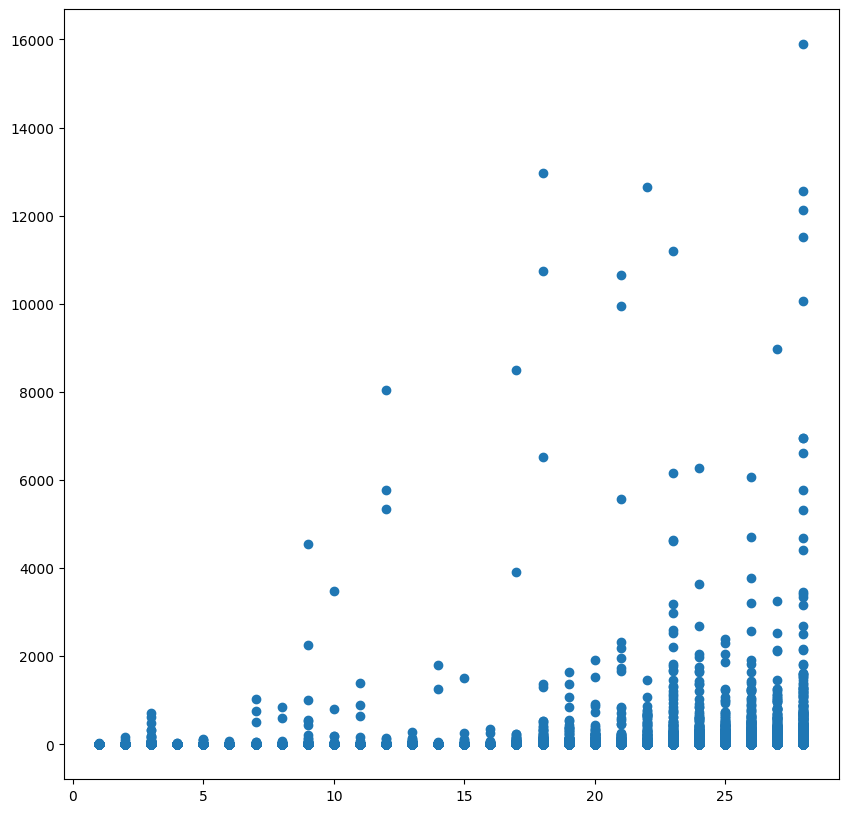

In [175]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)

In [112]:
analysis.points

array([['10.9983', '4.98832', '4.81787'],
       ['10.9918', '4.9905', '4.82993'],
       ['10.9705', '4.98378', '4.85512'],
       ...,
       ['10.7842', '4.92889', '4.63135'],
       ['10.7872', '4.9222', '4.61677'],
       ['10.7979', '4.92588', '4.62447']], dtype=object)

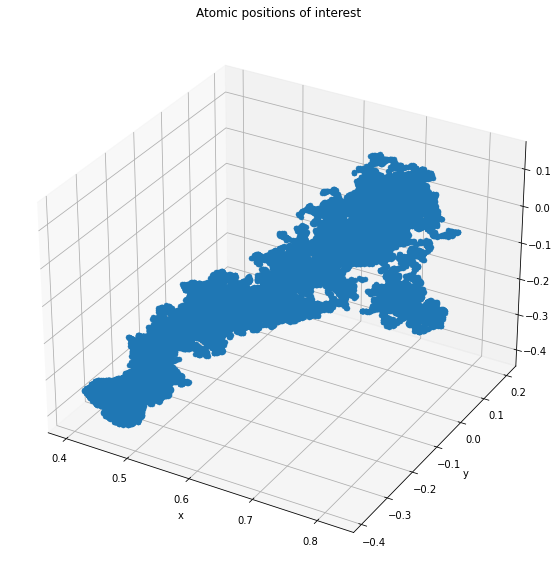

In [14]:
analysis.d_display(3, 'points')

In [160]:
pd.merge(analysis.data, analysis.d_show_data(), how='outer', left_index=True, right_index=True)

,time,x,y,z,trial,cycle,reprica,volume,point_index
0,0.0,10.9983,4.98832,4.81787,1,6,15,0,0
1,0.5,10.9918,4.9905,4.82993,1,6,15,0.096043,1
2,1.0,10.9705,4.98378,4.85512,1,6,15,0.028703,2
3,1.5,10.9587,4.97225,4.86184,1,6,15,0.059597,3
4,2.0,10.9484,4.97145,4.87296,1,6,15,0.022955,4
...,...,...,...,...,...,...,...,...,...
168835,98.0,10.7972,4.91805,4.65124,1,1,11,1.484731,168835
168836,98.5,10.7784,4.91217,4.6493,1,1,11,0.570002,168836
168837,99.0,10.7842,4.92889,4.63135,1,1,11,0.950342,168837
168838,99.5,10.7872,4.9222,4.61677,1,1,11,0.767337,168838


In [149]:
df = analysis.d_result
df[(df['trial'] == '1') & (df['cycle'] == '27') & (df['reprica'] == '27')]

,time,x,y,z,trial,cycle,reprica,volume,point_index
48240,0.0,12.6837,8.29978,7.13532,1,27,27,0.683759,48240
48241,0.5,12.6902,8.30944,7.1249,1,27,27,4.843815,48241
48242,1.0,12.7375,8.33363,7.1428,1,27,27,1.336702,48242
48243,1.5,12.7401,8.33305,7.15358,1,27,27,12.691749,48243
48244,2.0,12.722,8.3241,7.15514,1,27,27,12.917588,48244
...,...,...,...,...,...,...,...,...,...
48436,98.0,12.9673,8.54625,7.69901,1,27,27,12.186172,48436
48437,98.5,12.9506,8.58797,7.69665,1,27,27,250.747346,48437
48438,99.0,12.9493,8.63726,7.68091,1,27,27,1453.681518,48438
48439,99.5,12.9375,8.62271,7.66344,1,27,27,22.095421,48439


In [143]:
print(x)
print(y)
print(z)

[12.6837 12.6902 12.7375 12.7401 12.9007 12.9218 12.9199 12.9524 12.9749
 12.9893 12.987  12.9999 13.0071 12.9863 13.0027 13.0297 13.0342 13.047
 13.0363 13.0656 13.0701 13.0566 13.0381 13.0499 13.0355 12.722  12.7369
 13.0347 13.0154 13.0098 13.0174 13.0115 13.0163 12.9958 12.9773 12.9939
 12.9823 12.97   12.9419 12.9279 12.9224 12.9233 12.9261 12.9273 12.9126
 12.8961 12.9016 12.7549 12.7806 12.8934 12.9007 12.9062 12.9412 12.9423
 12.9151 12.9293 12.9353 12.9284 12.9238 12.9154 12.9128 12.9115 12.9007
 12.9209 12.9315 12.9369 12.9434 12.9521 12.9738 12.7934 12.7936 12.994
 12.9887 12.9926 13.0064 13.0104 13.0122 12.9862 12.9857 13.0001 12.9582
 12.9397 12.9293 12.9229 12.9358 12.9432 12.9394 12.9547 12.9649 12.9569
 12.938  12.7847 12.7943 12.9337 12.9294 12.9205 12.9328 12.9218 12.9298
 12.9223 12.9305 12.9266 12.9238 12.9549 12.9503 12.9368 12.9238 12.9394
 12.9409 12.942  12.9317 12.936  12.9341 12.8036 12.8189 12.9276 12.9268
 12.9135 12.9106 12.8926 12.8977 12.9065 12.8917 12.8

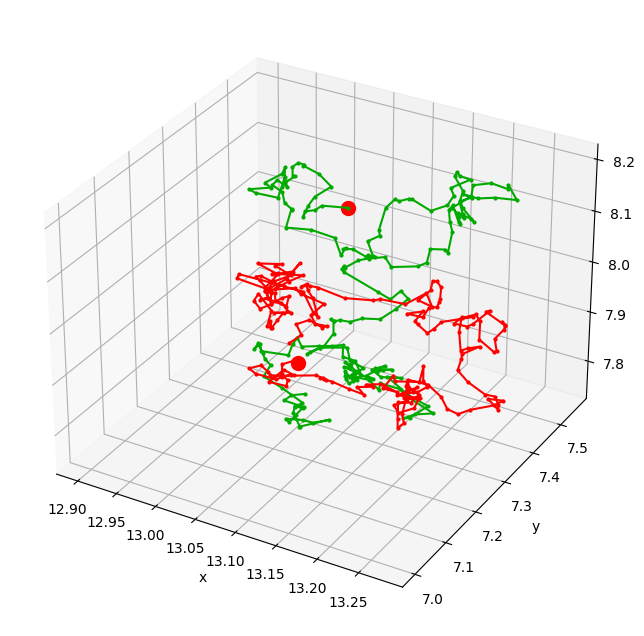

In [156]:
analysis.d_result
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = analysis.d_result
df = df[(df['trial'] == '1') & (df['cycle'] == '28') & (df['reprica'] == '27')]
x = np.array(df.loc[:, 'x'], dtype='float')
y = np.array(df.loc[:, 'y'], dtype='float')
z = np.array(df.loc[:, 'z'], dtype='float')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[0], y[0], z[0], "o",color='red', ms=10)
#for i in range(len(x)):
    #ax.plot(x[i], y[i], z[i], "o", color="#00aa00", ms=5, mew=0.11)

ax.plot(x, y, z, 'o-', color="#00aa00", mew=1, ms=2)
# 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

df = analysis.d_result
df = df[(df['trial'] == '1') & (df['cycle'] == '28') & (df['reprica'] == '25')]
x = np.array(df.loc[:, 'x'], dtype='float')
y = np.array(df.loc[:, 'y'], dtype='float')
z = np.array(df.loc[:, 'z'], dtype='float')

ax.plot(x[0], y[0], z[0], "o",color='red', ms=10)
#for i in range(len(x)):
    #ax.plot(x[i], y[i], z[i], "o", color="#00aa00", ms=5, mew=0.11)

ax.plot(x, y, z, 'o-', color="red", mew=1, ms=2)
# 表示
plt.show()


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# (x, y, z)
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
z = [1, 2, 3, 4, 5]

# 3Dでプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z, "o-", color="#00aa00", ms=4, mew=0.5)

# 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 表示
plt.show()

<Figure size 640x480 with 0 Axes>

In [38]:
y

array([4.98832, 4.9905 , 4.98378, ..., 4.92889, 4.9222 , 4.92588])

In [149]:
analysis.d_show_data().sort_values('volume', ascending=False).head(20)

,volume,point_index
135417,37262.075154,135417
61500,30390.06985,61500
96848,29666.457394,96848
20669,29458.436302,20669
20640,28457.559846,20640
135443,26979.445739,135443
117880,26246.396792,117880
73302,25190.496184,73302
11255,24972.281892,11255
24493,23617.633217,24493
